# 0.1.3: TRY Data exploration

## Imports and configuration

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from src.conf.conf import get_config
from src.conf.environment import log
from src.utils.df_utils import optimize_columns

%load_ext autoreload
%autoreload 2

# Display all columns when printing a pandas DataFrame
pd.set_option("display.max_columns", None)

conf = get_config()

try_raw_dir = Path(conf.trydb.raw.dir)
try_pfts_fp = Path(conf.trydb.raw.pfts)
try_prep_dir = Path(conf.trydb.interim.dir)

## Explore and extract zipped data

In [2]:
for item in try_raw_dir.iterdir():
    print(item)

data/raw/TRY_5_GapFilledData_2020/TRY_5_GapFilledData_2020.zip


Let's see what's inside.

In [4]:
import zipfile

with zipfile.ZipFile(try_raw_dir / conf.trydb.raw.zip, "r") as zip_ref:
    # print all items in the zip file
    zip_ref.printdir()

File Name                                             Modified             Size
TRY_50_2020_01/.smbdeleteAAA7564418            2020-01-24 13:30:46        90109
TRY_50_2020_01/Evaluation/                     2020-01-24 13:11:44            0
TRY_50_2020_01/Evaluation/~$BHPMF_tuning_n_feats.xlsx 2020-01-24 12:51:04            0
TRY_50_2020_01/Evaluation/BHPMF_tuning_n_feats.xlsx 2020-01-24 09:43:38        38392
TRY_50_2020_01/Evaluation/Predicted_observed_1_27.png 2020-01-24 10:25:24       244830
TRY_50_2020_01/Evaluation/Predicted_observed_2_27.png 2020-01-24 10:22:32       223856
TRY_50_2020_01/Evaluation/Predicted_observed_3_27.png 2020-01-24 10:26:30        66695
TRY_50_2020_01/Evaluation/RMSE_versus_Std_27_feats.png 2020-01-22 13:31:40         6189
TRY_50_2020_01/Evaluation/TraitHistograms_observed_predicted_1_27.pdf 2020-01-24 10:40:12        18063
TRY_50_2020_01/Evaluation/TraitHistograms_observed_predicted_2_27.pdf 2020-01-24 10:14:08        15512
TRY_50_2020_01/Evaluation/TraitHi

We only care about the gap-filled, back-transformed trait values that have species names, so let's only extract that.

In [10]:
ext_traits_fp = try_prep_dir / conf.trydb.raw.zipfile_csv
traits_fp = try_prep_dir / conf.trydb.interim.extracted_csv

In [11]:
import shutil

with zipfile.ZipFile(try_raw_dir / conf.trydb.raw.zip, "r") as zip_ref:
    try_prep_dir.mkdir(parents=True, exist_ok=True)
    zip_ref.extract(
        conf.trydb.raw.zipfile_csv,
        try_prep_dir,
    )

Clean up.

In [12]:
ext_traits_fp.rename(traits_fp)
shutil.rmtree(try_prep_dir / Path(conf.trydb.raw.zipfile_csv).parents[-2])

## Explore mean gap-filled + back-transformed trait data

Load the CSV as a DataFrame. We need to specify the index column, as well as use a non-standard encoding as there seem to be some special characters in some of the rows.

In [13]:
traits = pd.read_csv(traits_fp, encoding='latin-1', index_col=0)
traits.head()

,ObservationID,Species,Genus,Family,Unnamed: 5,X4,X6,X11,X13,X14,X15,X18,X21,X26,X27,X46,X47,X50,X55,X78,X95,X138,X144,X145,X146,X163,X169,X223,X224,X237,X281,X282,X289,X1080,X3112,X3113,X3114,X3120
1,15472,Acer campestre,Acer,Sapindaceae,1,0.575278,1.591828,16.555035,467.432582,20.878794,1.784443,9.683496,0.368328,17.181082,5.377838,0.196551,0.331949,1.288326,81.301877,-0.701485,80.308569,79.578894,50.521891,3.690276,25.187535,0.256265,123.341501,26.282017,1.912803,11.633834,18.572872,281.066851,602.987635,2125.125411,1744.813490,1814.698241,1986.123466,3.378113
2,15473,Acer platanoides,Acer,Sapindaceae,2,0.578694,2.684251,18.025933,478.993421,19.615932,1.945205,16.453191,0.030122,66.608260,11.851671,0.127338,0.382915,0.961727,404.946417,-7.424066,74.634681,1.631508,139.549049,15.342976,23.956750,1.087841,176.172945,27.215045,1.926785,22.069494,28.253946,244.409216,465.283791,2281.846496,8020.967391,6930.279638,9414.095662,2.844882
3,15474,Acer pseudoplatanus,Acer,Sapindaceae,3,0.565983,3.626007,14.525270,465.678355,23.054118,1.920284,13.641126,0.262056,47.551414,7.004249,0.156534,0.346476,1.565157,352.208256,-1.012057,87.289038,202.690497,53.749943,3.097091,22.991158,0.993188,95.906476,49.728493,1.926318,17.481870,35.892412,269.923990,625.571232,2912.703245,6559.387661,7161.510957,7258.748497,3.102016
4,15475,Aesculus hippocastanum,Aesculus,Sapindaceae,4,0.512497,1.294184,13.685400,476.455478,23.356395,1.536446,24.468778,1.470180,6962.717942,33.456486,0.143537,0.328325,1.754798,2466.893674,2.499158,72.254975,8670.167265,120.499395,22.382350,18.302804,7.984639,85.669665,32.814649,1.051404,36.273125,149.464337,1912.797150,1978.554979,222.062770,34646.499320,7422.981332,19558.197900,3.360854
5,15476,Alnus glutinosa,Alnus,Betulaceae,5,0.472010,0.650320,15.543528,477.811755,28.384565,1.856496,15.651437,0.285267,0.930106,1.964569,0.131884,0.322659,1.707116,189.108154,0.188134,89.851897,15150.591450,36.900260,5.762988,18.690510,0.615341,82.801892,29.629777,1.327681,2.429191,33.449572,370.340169,576.379892,2939.846214,2572.873819,2843.044898,2723.491784,3.424225


## Optimize data types

The data isn't huge, but optimization never hurts. We can drop the "Unnamed 5" column, convert strings to pyarrow, 64-bit floats to 32-bit, and then resave the file using parquet.

In [14]:
traits_opt = traits.drop(columns=["Unnamed: 5"]).pipe(lambda df: optimize_columns(df))
traits_opt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609355 entries, 1 to 609355
Data columns (total 37 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ObservationID  609355 non-null  int32  
 1   Species        609355 non-null  string 
 2   Genus          609355 non-null  string 
 3   Family         609355 non-null  string 
 4   X4             609355 non-null  float64
 5   X6             609355 non-null  float64
 6   X11            609355 non-null  float64
 7   X13            609355 non-null  float64
 8   X14            609355 non-null  float64
 9   X15            609355 non-null  float64
 10  X18            609355 non-null  float64
 11  X21            609355 non-null  float64
 12  X26            609355 non-null  float64
 13  X27            609355 non-null  float64
 14  X46            609355 non-null  float64
 15  X47            609355 non-null  float64
 16  X50            609355 non-null  float64
 17  X55            609355 non-null  fl

## Check for outliers and filter if necessary

The gap-filling process isn't perfect, and may have resulted in outliers due to either issues in parsing units or model anomalies. For example, the "height" trait in this dataset lists a maximum height of over 500,000 kilometers! Let's check the distributions of the traits to see if we have many outliers.

In [15]:
traits_opt.X18.describe() # X18 is "height in meters"

count    6.093550e+05
mean     1.573153e+03
std      8.337304e+05
min      5.990000e-09
25%      3.035167e-01
50%      8.420582e-01
75%      8.712631e+00
max      5.852195e+08
Name: X18, dtype: float64

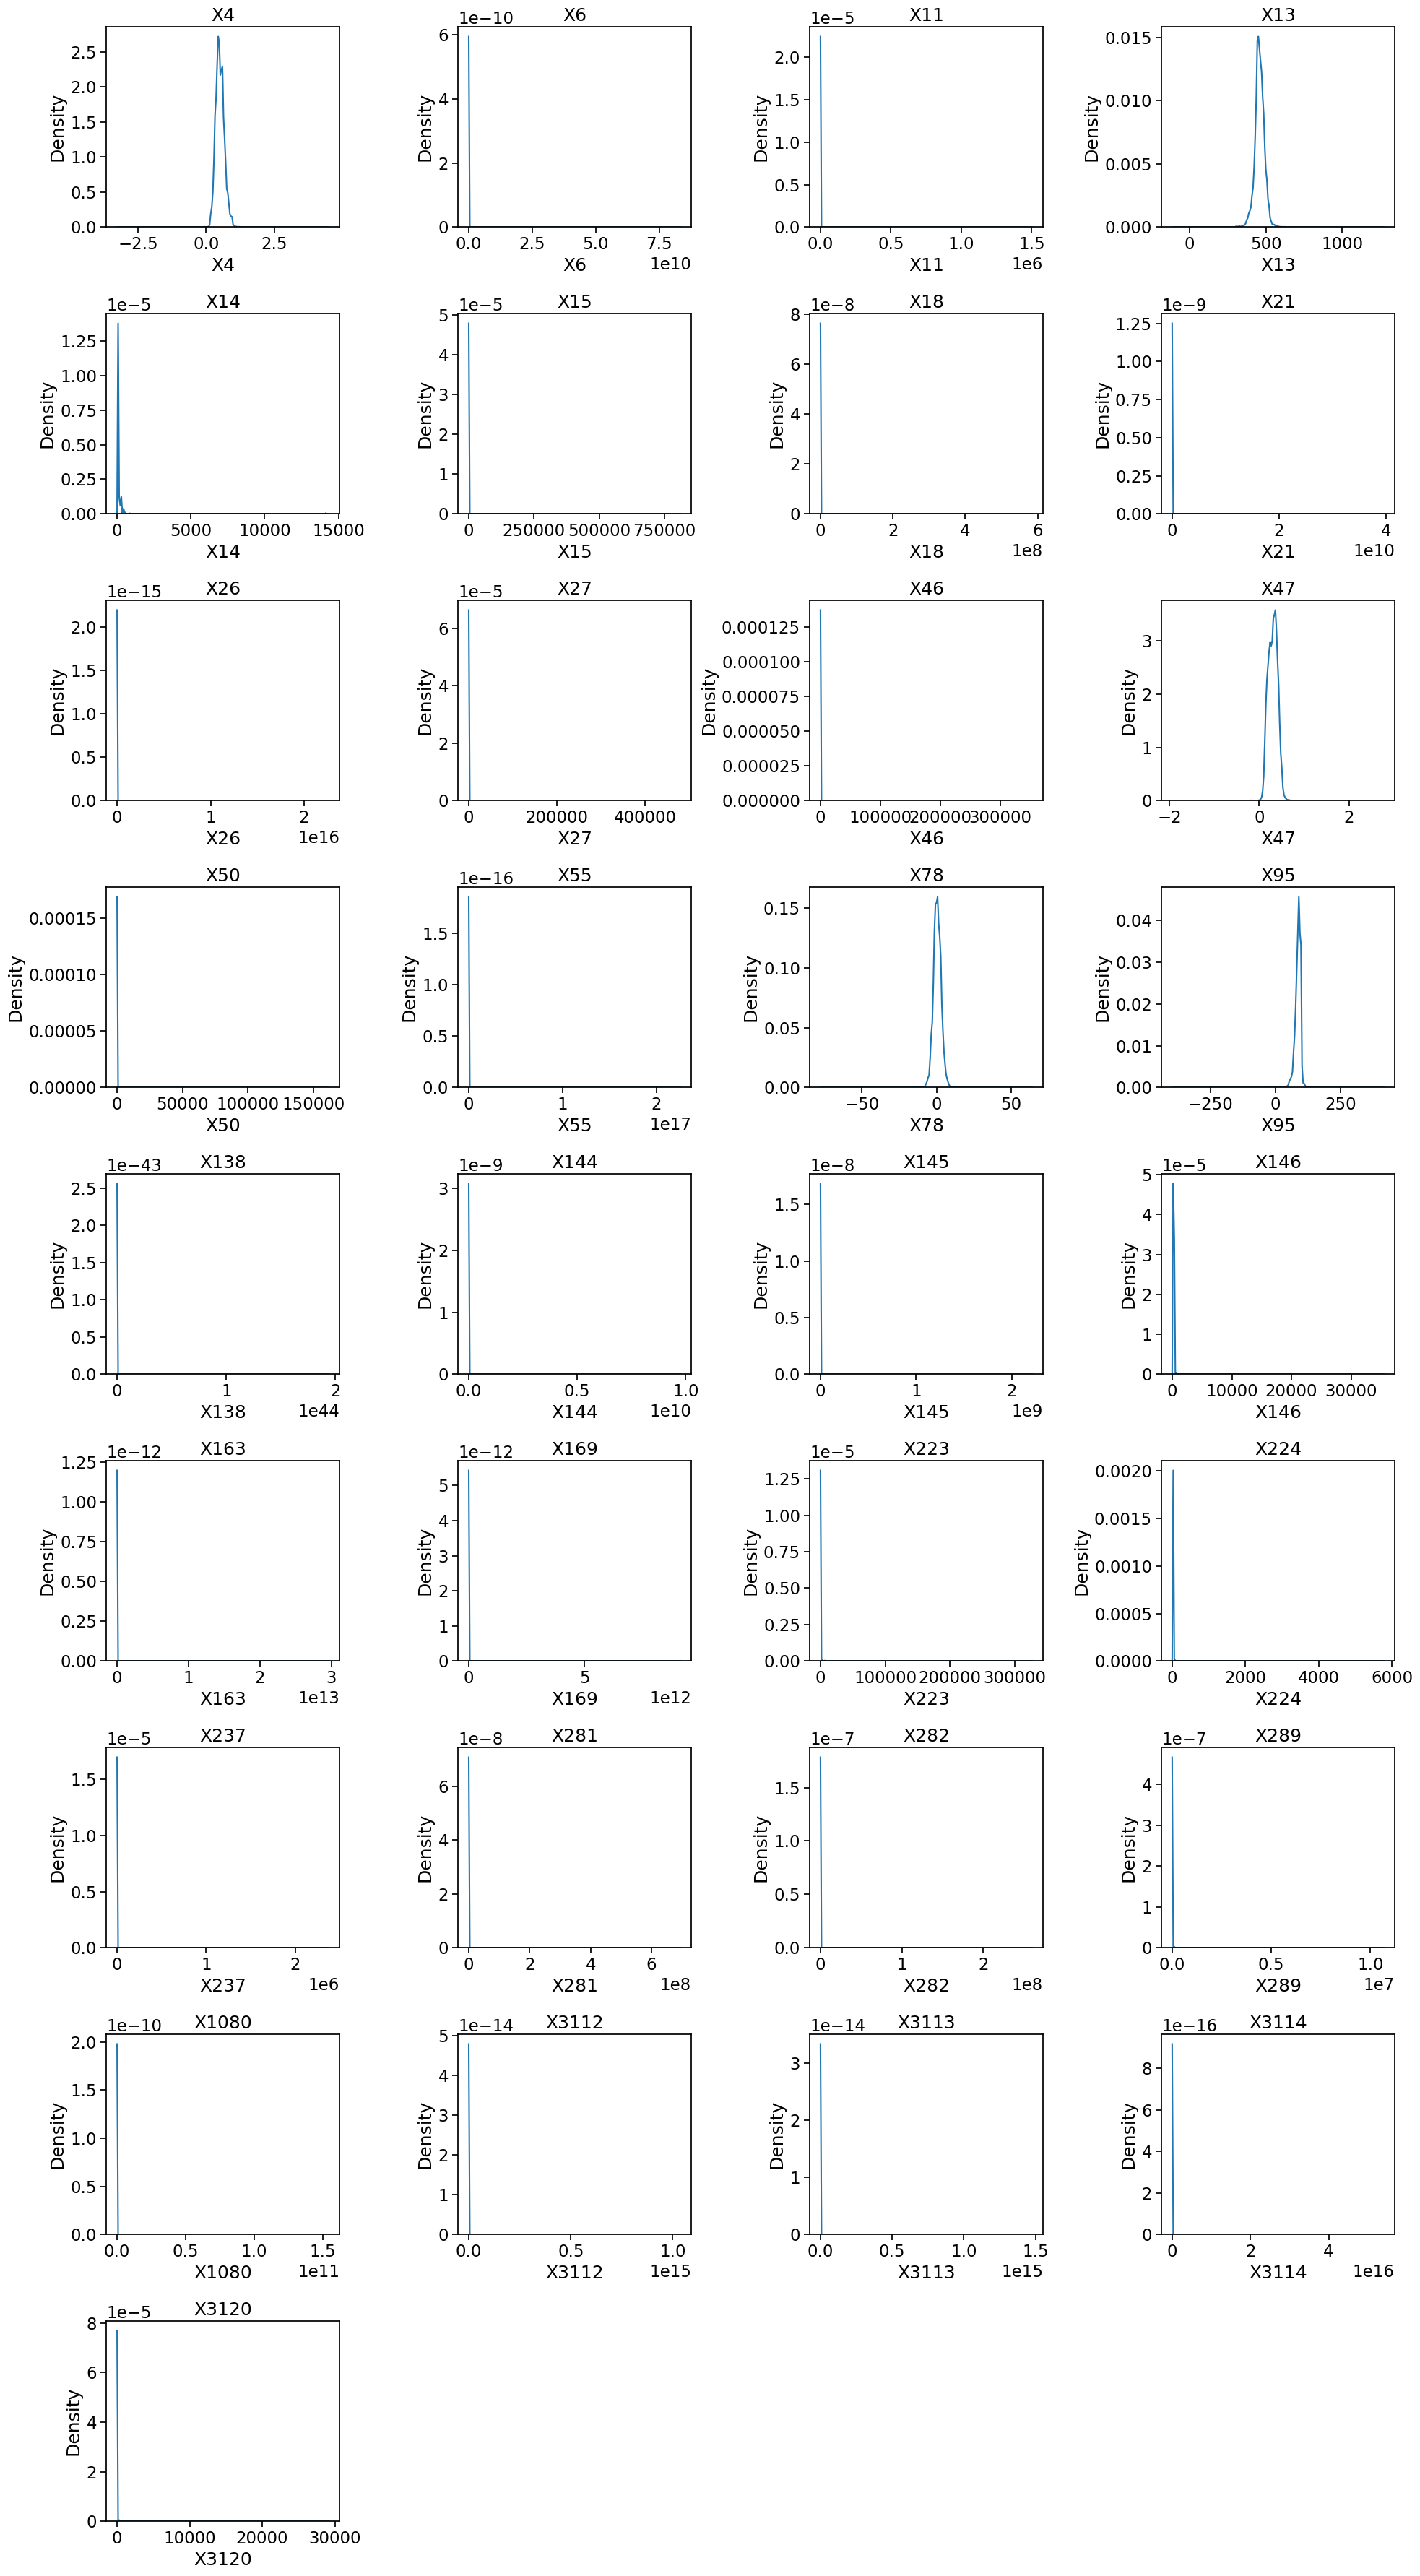

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df, ncols=4):
    nrows = int(np.ceil(df.shape[1] / ncols))
    figsize = (ncols * 5, nrows * 4)
    _, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        sns.kdeplot(df[col], ax=axes[i])
        axes[i].set_title(col)
    
    # clean up empty axes
    for i in range(len(df.columns), len(axes)):
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

# plot distributions for all cols starting with X
with sns.plotting_context("notebook", font_scale=1.5):
    plot_distributions(traits_opt.filter(like="X"))

As we can see, a few of the traits may follow normal distributions, but many are very heavy-tailed. This could be due to outliers, or it could be the natural distribution of the traits. Let's inspect the plots if we do minimal outlier filtering.

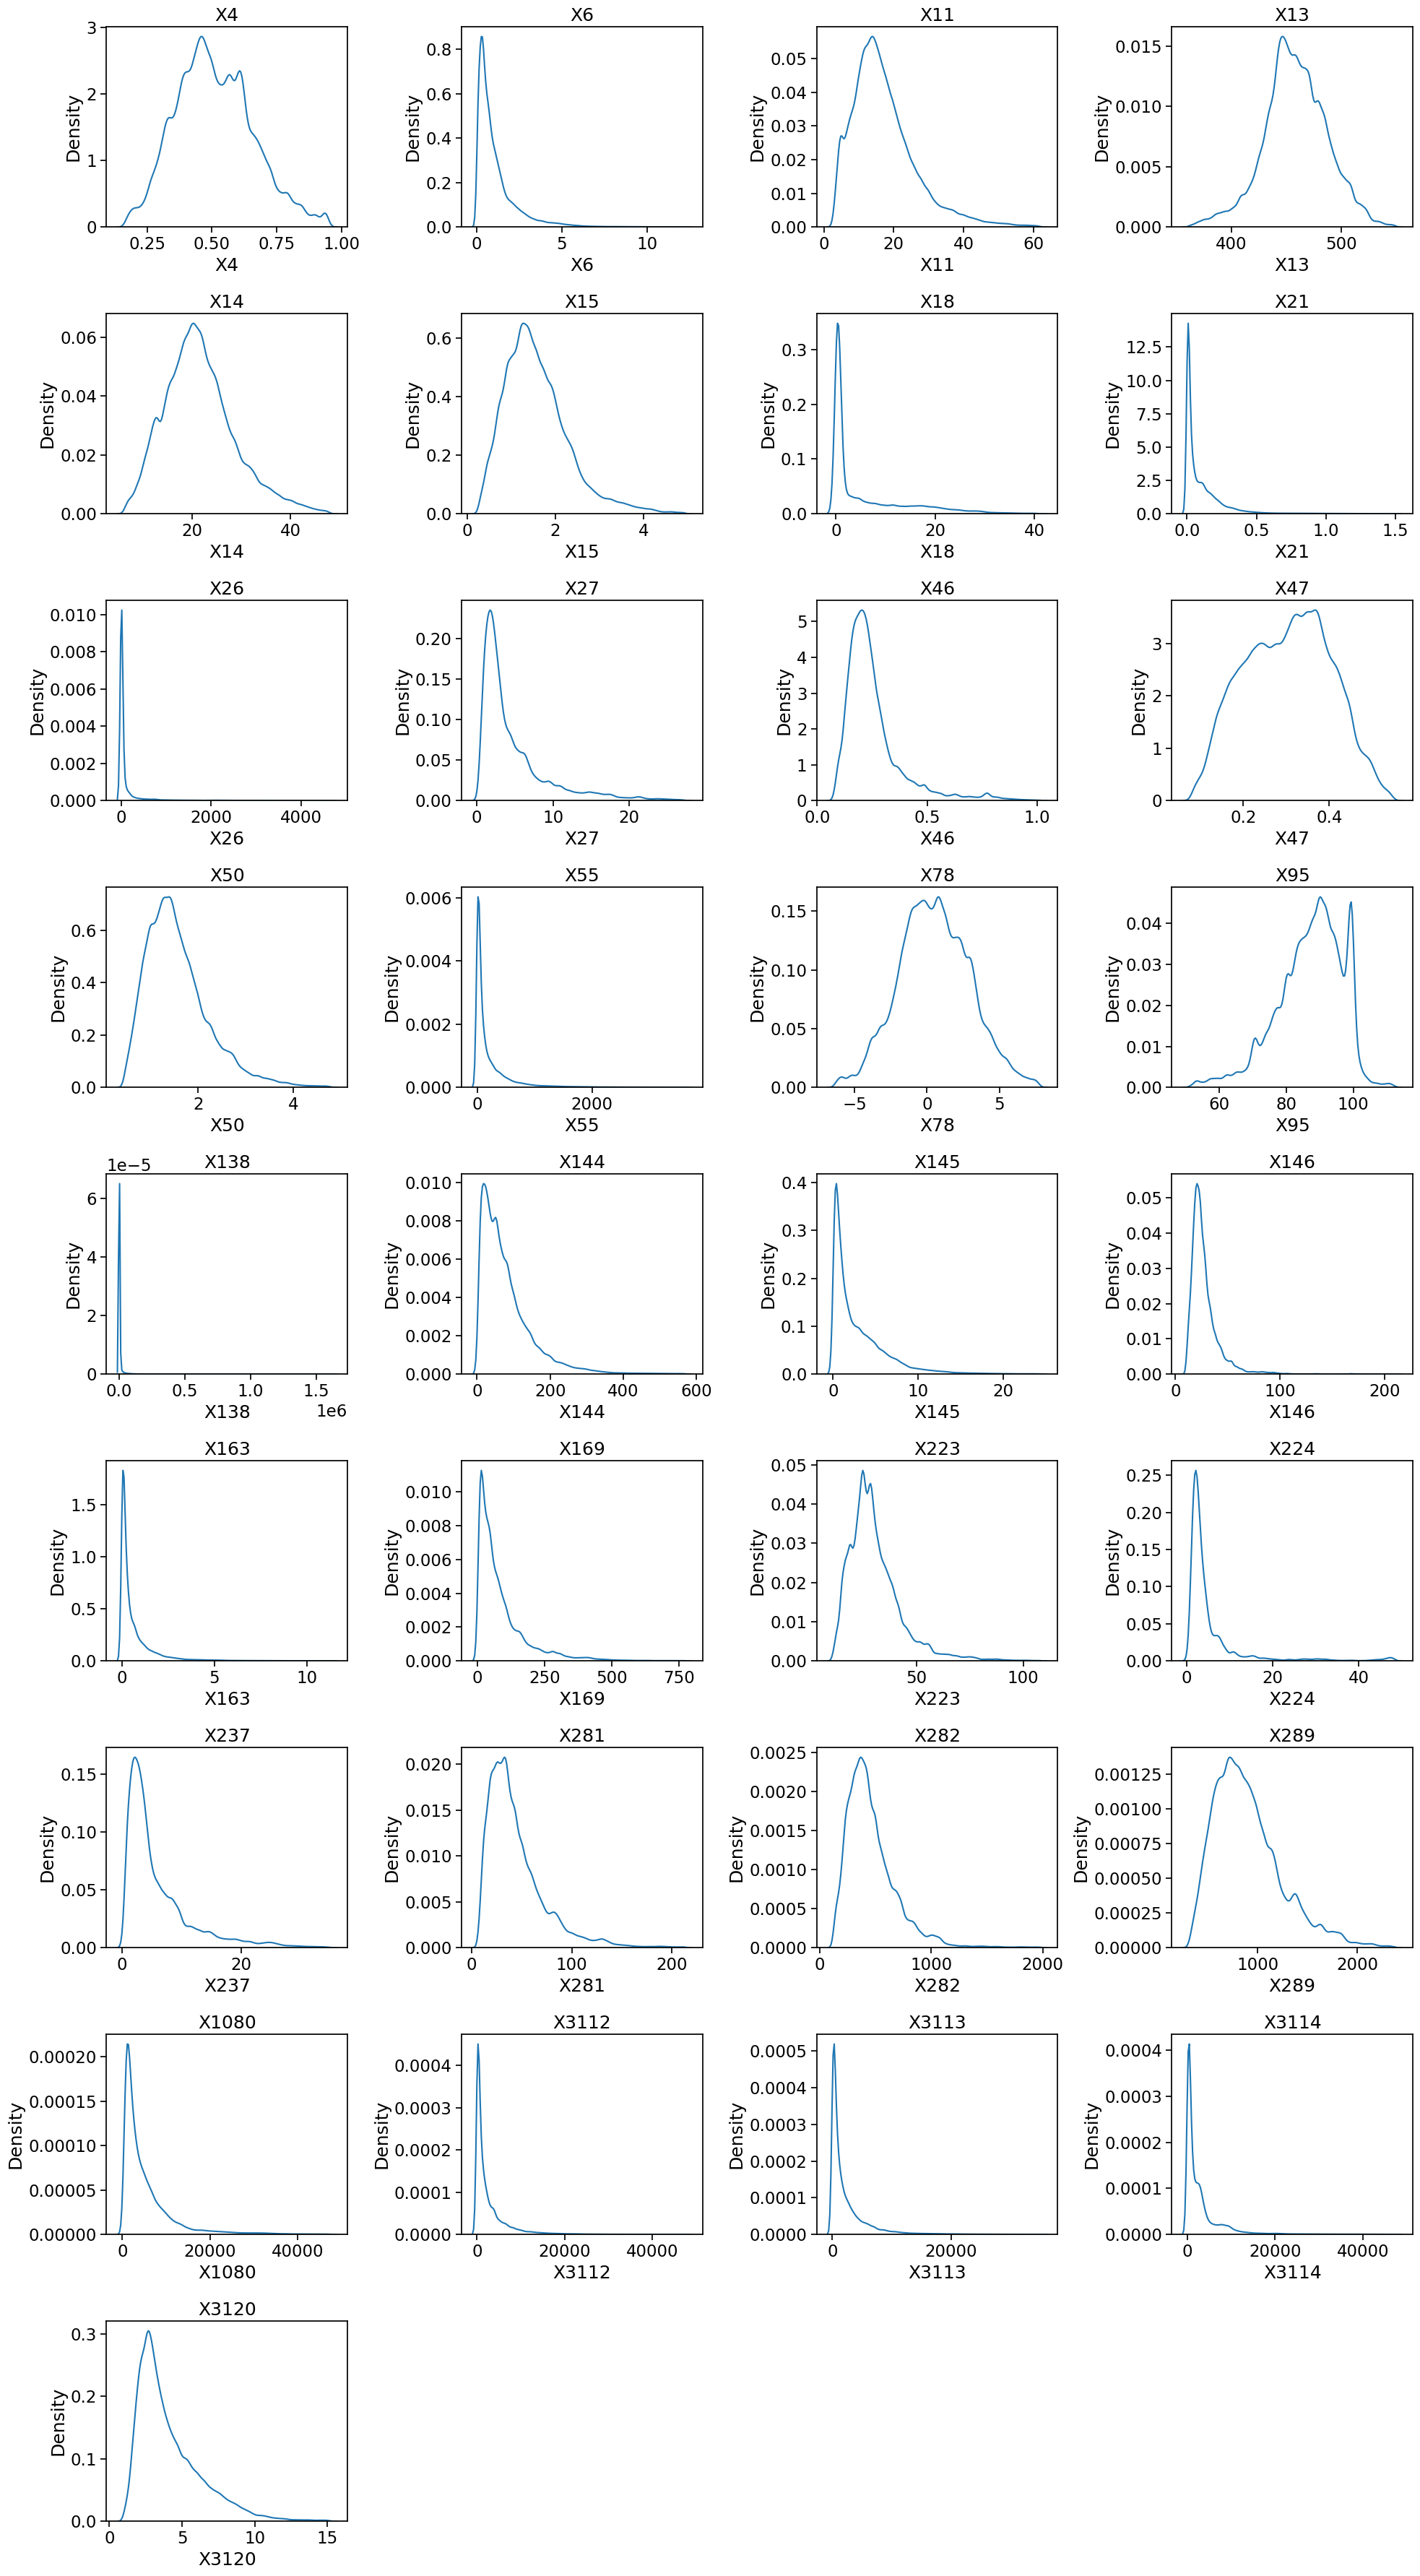

In [43]:
# Plot the distributions but only for 0.01-0.99 quantiles
from src.utils.df_utils import outlier_mask


def plot_distributions_quantiles(df, ncols=4, quantiles=(0.005, 0.995)):
    nrows = int(np.ceil(df.shape[1] / ncols))
    figsize = (ncols * 5, nrows * 4)
    _, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()
    for i, col in enumerate(df.columns):
        mask = outlier_mask(df[col], *quantiles)
        sns.kdeplot(df[col][mask], ax=axes[i])
        # q = df[col].quantile(quantiles).values
        # axes[i].set_xlim(q[0], q[1])
        axes[i].set_title(col)
    
    # clean up empty axes
    for i in range(len(df.columns), len(axes)):
        axes[i].axis("off")
    
    plt.tight_layout()
    plt.show()

with sns.plotting_context("notebook", font_scale=1.5):
    plot_distributions_quantiles(traits_opt.filter(like="X"))

Even minimal outlier filtering (only values outside the 0.005 and 0.995 quantiles) reveals much more natural-looking distributions. Of course, it's difficult to know exactly how well these distributions match real-world data, but given the known anomalies in the gap-filled trait data this has a decent probability of correcting those.

In [32]:
from src.utils.df_utils import filter_outliers

traits_filt = filter_outliers(
    traits_opt,
    cols=traits_opt.filter(like="X").columns.to_list(),
    quantiles=(0.005, 0.995),
    verbose=True
).reset_index(drop=True)

2024-05-06 09:55:52 UTC - src.utils.df_utils - INFO - Dropping 107007 rows (17.56%)


In [17]:
traits_filt.head()

,ObservationID,Species,Genus,Family,X4,X6,X11,X13,X14,X15,X18,X21,X26,X27,X46,X47,X50,X55,X78,X95,X138,X144,X145,X146,X163,X169,X223,X224,X237,X281,X282,X289,X1080,X3112,X3113,X3114,X3120
0,15472,Acer campestre,Acer,Sapindaceae,0.575278,1.591828,16.555035,467.432582,20.878794,1.784443,9.683496,0.368328,17.181082,5.377838,0.196551,0.331949,1.288326,81.301877,-0.701485,80.308569,79.578894,50.521891,3.690276,25.187535,0.256265,123.341501,26.282017,1.912803,11.633834,18.572872,281.066851,602.987635,2125.125411,1744.813490,1814.698241,1986.123466,3.378113
1,15474,Acer pseudoplatanus,Acer,Sapindaceae,0.565983,3.626007,14.525270,465.678355,23.054118,1.920284,13.641126,0.262056,47.551414,7.004249,0.156534,0.346476,1.565157,352.208256,-1.012057,87.289038,202.690497,53.749943,3.097091,22.991158,0.993188,95.906476,49.728493,1.926318,17.481870,35.892412,269.923990,625.571232,2912.703245,6559.387661,7161.510957,7258.748497,3.102016
2,15476,Alnus glutinosa,Alnus,Betulaceae,0.472010,0.650320,15.543528,477.811755,28.384565,1.856496,15.651437,0.285267,0.930106,1.964569,0.131884,0.322659,1.707116,189.108154,0.188134,89.851897,15150.591450,36.900260,5.762988,18.690510,0.615341,82.801892,29.629777,1.327681,2.429191,33.449572,370.340169,576.379892,2939.846214,2572.873819,2843.044898,2723.491784,3.424225
3,15478,Amelanchier lamarckii,Amelanchier,Rosaceae,0.686907,0.467507,11.971548,481.182143,19.160691,1.897517,5.570966,0.134826,3.983657,4.306239,0.146683,0.354688,1.545614,79.684118,-3.004962,83.638867,7.538457,21.629353,2.903657,24.809214,0.219946,222.729805,64.300809,2.676017,7.770355,18.508551,394.083172,600.331734,2087.593077,1162.065138,985.996593,404.442517,2.997821
4,15479,Arbutus unedo,Arbutus,Ericaceae,0.776170,0.303001,9.347594,500.539544,12.842393,1.073463,5.095646,0.163328,2.108576,1.895515,0.268577,0.385879,1.542539,116.581997,-5.225039,71.187010,44.671327,61.483836,2.251292,41.226351,0.279947,93.398669,27.276680,3.014798,2.794471,17.734275,375.354371,678.855050,1245.762033,1145.294297,1449.234933,458.232631,2.558773


## Reduce traits to mean values

Not all species names consist only of two names, so to improve later matching with PFTs as well as with GBIF and sPlot data, let's limit species names to only their first two words.

In [18]:
traits_filt.Species.str.split().str.len().value_counts()

Species
2    501819
3       527
1         2
Name: count, dtype: int64

In [44]:
def genus_species_caps(col: pd.Series) -> pd.Series:
    col = col.str.title()
    return col.str.split().map(lambda x: x[0] + " " + x[1].lower())


traits_filt_mean = (
    traits_filt.drop(columns=["ObservationID", "Family", "Genus"])
    .assign(
        speciesname=lambda df: df.Species.str.extract(
            "([A-Za-z]+ [A-Za-z]+)", expand=False
        )
    )
    .dropna(subset="speciesname")
    .drop(columns=["Species"])
    .assign(speciesname=lambda df: genus_species_caps(df.speciesname))
    .groupby("speciesname")
    .mean()
)

In [49]:
traits_filt_mean.shape

(45934, 33)

In [38]:
traits_filt_mean.head()

,X4,X6,X11,X13,X14,X15,X18,X21,X26,X27,X46,X47,X50,X55,X78,X95,X138,X144,X145,X146,X163,X169,X223,X224,X237,X281,X282,X289,X1080,X3112,X3113,X3114,X3120
speciesname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aaronsohnia pubescens,0.486141,0.599528,16.718827,437.285876,19.528472,1.593238,0.201538,0.009885,0.668115,2.173617,0.279432,0.228487,1.316797,25.602265,0.127767,90.961137,397.700967,44.752410,0.885511,31.782871,0.115850,90.535661,26.868937,4.959702,2.990646,27.827261,423.785320,826.012763,4687.727659,382.471068,401.876664,392.094266,5.076392
Abarema adenophora,0.668191,0.724484,11.160568,525.798172,24.508027,1.393628,30.916319,0.369043,128.146899,10.405456,0.233701,0.468931,2.159665,815.751720,4.198817,75.950129,7878.738232,29.818184,2.559127,21.286710,1.992848,19.124804,16.411156,2.532258,7.610134,53.898247,1021.661588,2042.333592,899.896149,11623.957175,1258.472967,8128.683928,1.909676
Abarema adenophorum,0.373883,0.487666,14.205463,492.190726,29.024637,1.046841,23.271589,0.204930,96.355248,9.297016,0.223141,0.429835,1.926335,312.589592,3.746875,81.965979,4998.461797,19.225122,1.607744,17.181488,0.912215,16.247852,18.938262,2.667201,6.954843,45.745568,715.537425,1426.905190,1111.750790,5530.627109,2805.067978,3127.058669,2.313586
Abarema alexandri,0.561525,0.676757,13.221454,492.933836,27.439778,0.935064,16.906838,0.242243,71.790336,7.843764,0.219078,0.444827,2.019783,154.049285,3.596090,80.121546,1437.577709,11.411715,0.989792,18.736084,0.421267,17.400078,17.646984,2.512018,6.061004,42.442453,628.429257,1390.248537,1108.703464,2445.241045,672.598456,1450.214849,2.076229
Abarema barbouriana,0.568063,0.691448,11.987579,488.500895,25.991496,0.931856,10.109027,0.211743,57.474990,7.073070,0.209359,0.453810,2.093908,33.105856,3.362433,80.787520,1358.189986,4.998624,0.324473,19.284952,0.090545,19.625669,17.525775,2.988909,5.471765,41.523688,623.750468,1340.275324,869.983581,497.271697,46.243982,289.546396,1.964966


## Link mean traits with PFTs

### Load the PFTs

In [37]:
pfts = pd.read_csv(try_pfts_fp, encoding="latin-1")
pfts.head()

,AccSpeciesID,AccSpeciesName,pft
0,9228,Calamagrostis lapponica,Grass
1,10400,Carex capitata,Grass
2,10647,Carex rostrata,Grass
3,10654,Carex saxatilis,Grass
4,10701,Carex vaginata,Grass


Truncate species names to first two words and set species as index.

In [39]:
pfts = (
    pfts.drop(columns=["AccSpeciesID"])
    .assign(
        speciesname=lambda df: df.AccSpeciesName.str.extract(
            "([A-Za-z]+ [A-Za-z]+)", expand=False
        )
    )
    .dropna(subset="speciesname")
    .drop(columns=["AccSpeciesName"])
    .set_index("speciesname")
)

Link with traits

In [51]:
traits_filt_mean_pfts = traits_filt_mean.join(pfts, how="inner")

In [52]:
traits_filt_mean_pfts.head()

,X4,X6,X11,X13,X14,X15,X18,X21,X26,X27,X46,X47,X50,X55,X78,X95,X138,X144,X145,X146,X163,X169,X223,X224,X237,X281,X282,X289,X1080,X3112,X3113,X3114,X3120,pft
speciesname,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abarema adenophora,0.668191,0.724484,11.160568,525.798172,24.508027,1.393628,30.916319,0.369043,128.146899,10.405456,0.233701,0.468931,2.159665,815.751720,4.198817,75.950129,7878.738232,29.818184,2.559127,21.286710,1.992848,19.124804,16.411156,2.532258,7.610134,53.898247,1021.661588,2042.333592,899.896149,11623.957175,1258.472967,8128.683928,1.909676,Tree
Abarema adenophorum,0.373883,0.487666,14.205463,492.190726,29.024637,1.046841,23.271589,0.204930,96.355248,9.297016,0.223141,0.429835,1.926335,312.589592,3.746875,81.965979,4998.461797,19.225122,1.607744,17.181488,0.912215,16.247852,18.938262,2.667201,6.954843,45.745568,715.537425,1426.905190,1111.750790,5530.627109,2805.067978,3127.058669,2.313586,Tree
Abarema alexandri,0.561525,0.676757,13.221454,492.933836,27.439778,0.935064,16.906838,0.242243,71.790336,7.843764,0.219078,0.444827,2.019783,154.049285,3.596090,80.121546,1437.577709,11.411715,0.989792,18.736084,0.421267,17.400078,17.646984,2.512018,6.061004,42.442453,628.429257,1390.248537,1108.703464,2445.241045,672.598456,1450.214849,2.076229,Tree
Abarema barbouriana,0.568063,0.691448,11.987579,488.500895,25.991496,0.931856,10.109027,0.211743,57.474990,7.073070,0.209359,0.453810,2.093908,33.105856,3.362433,80.787520,1358.189986,4.998624,0.324473,19.284952,0.090545,19.625669,17.525775,2.988909,5.471765,41.523688,623.750468,1340.275324,869.983581,497.271697,46.243982,289.546396,1.964966,Tree
Abarema barbouriana,0.568063,0.691448,11.987579,488.500895,25.991496,0.931856,10.109027,0.211743,57.474990,7.073070,0.209359,0.453810,2.093908,33.105856,3.362433,80.787520,1358.189986,4.998624,0.324473,19.284952,0.090545,19.625669,17.525775,2.988909,5.471765,41.523688,623.750468,1340.275324,869.983581,497.271697,46.243982,289.546396,1.964966,Tree


In [54]:
print(
    "Pct species matched with PFT: "
    f"{traits_filt_mean_pfts.shape[0] / traits_filt_mean.shape[0]:.2%}"
)

Pct species matched with PFT: 90.74%


## Save the filtered, mean trait data

In [56]:
traits_filt_mean_pfts.to_parquet(
    try_prep_dir / conf.trydb.interim.filtered, index=False, compression="zstd"
)

# clean up
traits_fp.unlink()

## Compare species in common with sPlot

In [78]:
pfts.AccSpeciesName.nunique()

120428

In [80]:
traits_opt.Species.nunique()

52104

We can load the sPlot vegetation data and see how many species names intersect.

In [79]:
veg_fp = Path(conf.preprocessed.traits) / "splot/vegetation.parquet"
veg = pd.read_parquet(veg_fp)

FileNotFoundError: [Errno 2] No such file or directory: 'data/preprocessed/traits/splot/vegetation.parquet'

Determine which species both dataframes have in common

In [6]:
traits = traits.assign(Species=traits.Species.astype("category"))
veg = veg.assign(Species=veg.Species.astype("category"))
species_common = traits.Species.cat.categories.intersection(veg.Species.cat.categories)

In [9]:
len(species_common)

29420

120,428 unique species names in the PFTs table and 116,086 in the sPlot `vegetation_df`, while only 52,104 in the actual traits table.

**And after finding the species in common between `vegetation_df` (sPlot) and `traits` (TRY gap-filled), we only end up with 29,420! This may be solved by pulling an updated version of the TRY data, but either way, the gap-filled dataset will likely still only contain trait values for a small subset of the species in sPlot.**